In [2]:
%%time
#Импорт CSV

import pandas as pd
import numpy as np

file_name = 'netology-ipynb/power.csv'

#уменьшение памяти в 2 раза
#data = pd.read_csv(file_name, dtype={'year':np.int16, 'category':np.int8, 'quantity':np.float32})

data = pd.read_csv(file_name)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   country   1189482 non-null  object 
 1   year      1189482 non-null  int64  
 2   quantity  1189482 non-null  float64
 3   category  1189482 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 36.3+ MB
Wall time: 1.14 s


In [65]:
data.head()

,country,year,quantity,category
0,Austria,1996,5.0,1
1,Austria,1995,17.0,1
2,Belgium,2014,0.0,1
3,Belgium,2013,0.0,1
4,Belgium,2012,35.0,1


In [87]:
data['category'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 12, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71], dtype=int64)

In [89]:
data['quantity'].max()
data['quantity'].min()

-864348.0

In [95]:
print(len(data[data['quantity'] < 0 ]),len(data[data['quantity'] > 0 ]))

18084 1115866


In [5]:
#Отдельный столбец

data['year'].describe()

#или так
#data.year.head()

0    1996
1    1995
2    2014
3    2013
4    2012
Name: year, dtype: int64

In [60]:
%%time
#Series
print('type:',type(data['year']))

#Уникальные значения
#print(data['country'].unique())
print('уникальных стран:',len(data['country'].unique()))

#Преобразование списка уникальных элементов в словарь
unique_country = data['country'].value_counts().to_dict()

#Количество каждого уникального значения - частота
for country, count in unique_country.items():
    print(country, count)

type: <class 'pandas.core.series.Series'>
уникальных стран: 243
Germany 20422
United States 19847
Poland 19802
Austria 17440
Romania 17357
France 17236
Japan 17037
Czechia 16588
Italy 16312
Netherlands 15955
Spain 15815
Hungary 15778
Australia 15652
United Kingdom 15536
Canada 15453
Russian Federation 15020
Finland 14982
Belgium 14914
Korea, Republic of 14849
Slovakia 14676
Sweden 14154
Denmark 13127
Norway 12664
Turkey 12526
Portugal 12215
Bulgaria 12104
Switzerland 11890
Greece 11753
Croatia 11607
China 11563
New Zealand 11270
Mexico 11098
Brazil 10374
Ukraine 10084
Ireland 10002
Chile 9715
Estonia 9689
Lithuania 9313
Other Asia 9271
Slovenia 9112
Belarus 8677
Latvia 8304
Argentina 8122
Indonesia 8036
Colombia 7933
Kazakhstan 7902
India 7775
South Africa 7637
Thailand 7448
Philippines 7322
Uruguay 6883
T.F.Yug.Rep. Macedonia 6866
Iran (Islamic Rep. of) 6829
Peru 6612
Malaysia 6575
Venezuela (Bolivar. Rep.) 6545
Uzbekistan 6190
Luxembourg 6155
Republic of Moldova 5961
Azerbaijan 5936


In [62]:
#Фильтрация

data[['country','year']].head()

,country,year
0,Austria,1996
1,Austria,1995
2,Belgium,2014
3,Belgium,2013
4,Belgium,2012


In [71]:
#список стран с потреблением выше среднего

data.keys()
mean_quant = data['quantity'].mean()


data[data['quantity'] > mean_quant].head()

,country,year,quantity,category
3228,United States,2014,367987.0,2
3229,United States,2013,384439.0,2
3230,United States,2012,370625.0,2
3231,United States,2011,310909.0,2
3232,United States,2010,335418.0,2


In [5]:
%%time
#Еще фильтры

#оставить только строки, где в countryes есть 'us', а потом взять уникальные значения столбца countryes

data[data['country'].str.contains('rus',case = False)]['country'].unique()

Wall time: 935 ms


array(['Brunei Darussalam', 'Russian Federation', 'Belarus', 'Cyprus'],
      dtype=object)

In [81]:
#Фильтры на несколько условий

data[(data['country'] == 'Russian Federation') | (data['country'] == 'Belarus')]['country'].unique()

array(['Russian Federation'], dtype=object)

In [86]:
#Фильтр по номеру строки

#data.loc[1000:1006]

data['country'].loc[100:200].head()

100    Netherlands
101    Netherlands
102    Netherlands
103    Netherlands
104    Netherlands
Name: country, dtype: object

<AxesSubplot:xlabel='year', ylabel='quantity'>

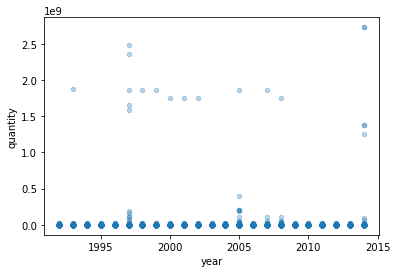

In [114]:
data[ data['country'] == 'Russian Federation'][['year', 'quantity']].plot.scatter(x = 'year',y = 'quantity', alpha = 0.3)